Skin Cancer Classification
Depositphotos_26089363_s-2015.jpg

Skin cancer is a type of cancer that affects the skin cells. It is the most common form of cancer in the United States. There are three main types of skin cancer: basal cell carcinoma, squamous cell carcinoma, and melanoma. Basal cell carcinoma and squamous cell carcinoma are the most common types and are usually not life-threatening, but melanoma can be aggressive and spread to other parts of the body.

Risk factors for skin cancer include excessive sun exposure, sunburns, fair skin, family history, and a weakened immune system. Symptoms can include a new or changing mole, a sore that doesn't heal, or a bump or spot that's growing.

Diagnosis is typically made through a skin biopsy, in which a sample of skin is removed and examined under a microscope. Treatment options depend on the type and stage of the cancer and may include surgery, radiation therapy, or chemotherapy. Prevention measures include avoiding sun exposure, wearing protective clothing and using a broad-spectrum sunscreen with an SPF of at least 30. Early detection is crucial for successful treatment, so it's important to have regular skin checks and be aware of any changes to your skin.

Dataset Overview
HAM10000 ("Human Against Machine with 10000 training images") dataset - a large collection of multi-source dermatoscopic images of pigmented lesions

The dermatoscopic images are collected from different populations, acquired and stored by different modalities. The final dataset consists of 10015 dermatoscopic images.

It has 7 different classes of skin cancer which are listed below :

Melanocytic nevi
Melanoma
Benign keratosis-like lesions
Basal cell carcinoma
Actinic keratoses
Vascular lesions
Dermatofibroma

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import itertools

from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils.vis_utils import plot_model

## Reading MetaData

In [4]:
df = pd.read_csv('../input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
df.head(20)

lesion_id      image_id   dx dx_type   age     sex     localization
0   HAM_0000118  ISIC_0027419  bkl   histo  80.0    male            scalp
1   HAM_0000118  ISIC_0025030  bkl   histo  80.0    male            scalp
2   HAM_0002730  ISIC_0026769  bkl   histo  80.0    male            scalp
3   HAM_0002730  ISIC_0025661  bkl   histo  80.0    male            scalp
4   HAM_0001466  ISIC_0031633  bkl   histo  75.0    male              ear
5   HAM_0001466  ISIC_0027850  bkl   histo  75.0    male              ear
6   HAM_0002761  ISIC_0029176  bkl   histo  60.0    male             face
7   HAM_0002761  ISIC_0029068  bkl   histo  60.0    male             face
8   HAM_0005132  ISIC_0025837  bkl   histo  70.0  female             back
9   HAM_0005132  ISIC_0025209  bkl   histo  70.0  female             back
10  HAM_0001396  ISIC_0025276  bkl   histo  55.0  female            trunk
11  HAM_0004234  ISIC_0029396  bkl   histo  85.0  female            chest
12  HAM_0004234  ISIC_0025984  bkl   histo  85.0  female            chest
13  HAM_0001949  ISIC_0025767  bkl   histo  70.0    male            trunk
14  HAM_0001949  ISIC_0032417  bkl   histo  70.0    male            trunk
15  HAM_0007207  ISIC_0031326  bkl   histo  65.0    male             back
16  HAM_0001601  ISIC_0025915  bkl   histo  75.0    male  upper extremity
17  HAM_0001601  ISIC_0031029  bkl   histo  75.0    male  upper extremity
18  HAM_0007571  ISIC_0029836  bkl   histo  70.0    male            chest
19  HAM_0007571  ISIC_0032129  bkl   histo  70.0    male            chest

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [6]:
df.shape

(10015, 7)

## Data Preprocessing¶
## Creating dictionary for displaying more human-friendly labels.

In [8]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_skin_dir = '../input/skin-cancer-mnist-ham10000'

## Merge images from both folders into one dictionary

In [9]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

## Creating new columns for better understanding of features

In [10]:
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes

df.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                                path  \
0  ../input/skin-cancer-mnist-ham10000/ham10000_i...   
1  ../input/skin-cancer-mnist-ham10000/ham10000_i...   
2  ../input/skin-cancer-mnist-ham10000/ham10000_i...   
3  ../input/skin-cancer-mnist-ham10000/ham10000_i...   
4  ../input/skin-cancer-mnist-ham10000/ham10000_i...   

                        cell_type  cell_type_idx  
0  Benign keratosis-like lesions               2  
1  Benign keratosis-like lesions               2  
2  Benign keratosis-like lesions               2  
3  Benign keratosis-like lesions               2  
4  Benign keratosis-like lesions               2

## Data Cleaning

In [11]:
df.isna().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

In [12]:
df['age'].fillna((df['age'].mean()), inplace=True)

In [13]:
df.isna().sum().sum()

0

## Note :

### Our data is clean now, without any null values.

# Exploratory Data Analysis¶
## Gender wise differentiability

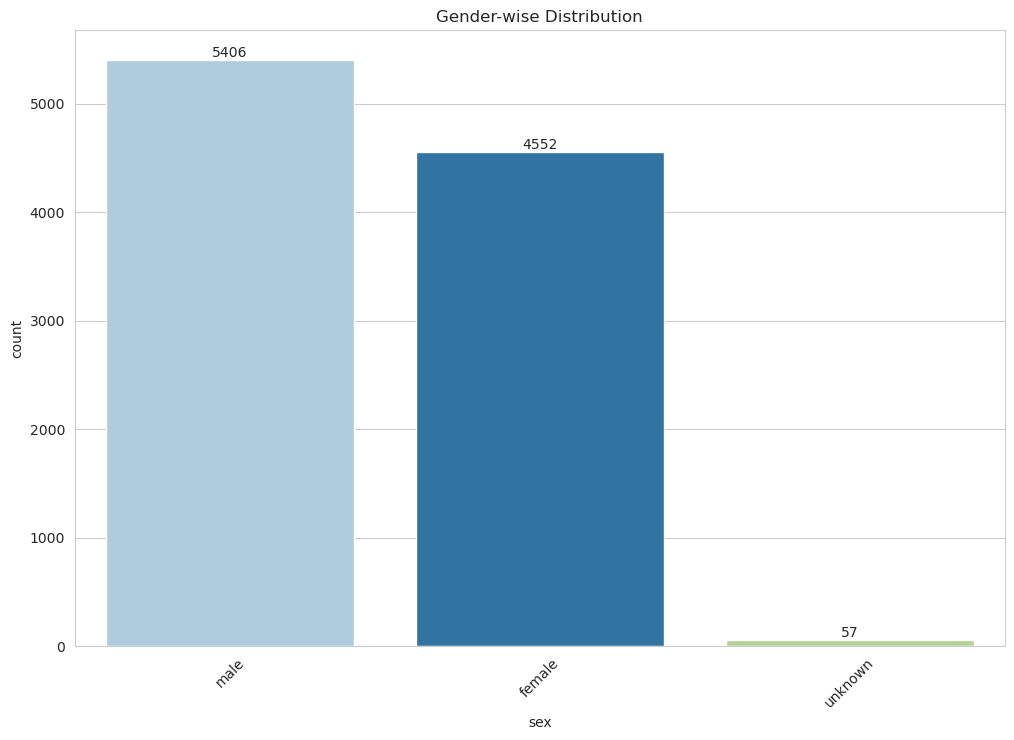

In [14]:
sns.set_style('whitegrid')
colors = ['#87ace8','#e3784d', 'green']
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='sex',data=df, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender-wise Distribution')
plt.xticks(rotation=45)
plt.show()

## Note :

### It seems majority of the male being affected from skin cancer symptoms.
### Though we can say there is not apar difference when considering being affected genderwise.

# Cell type affect on Patients

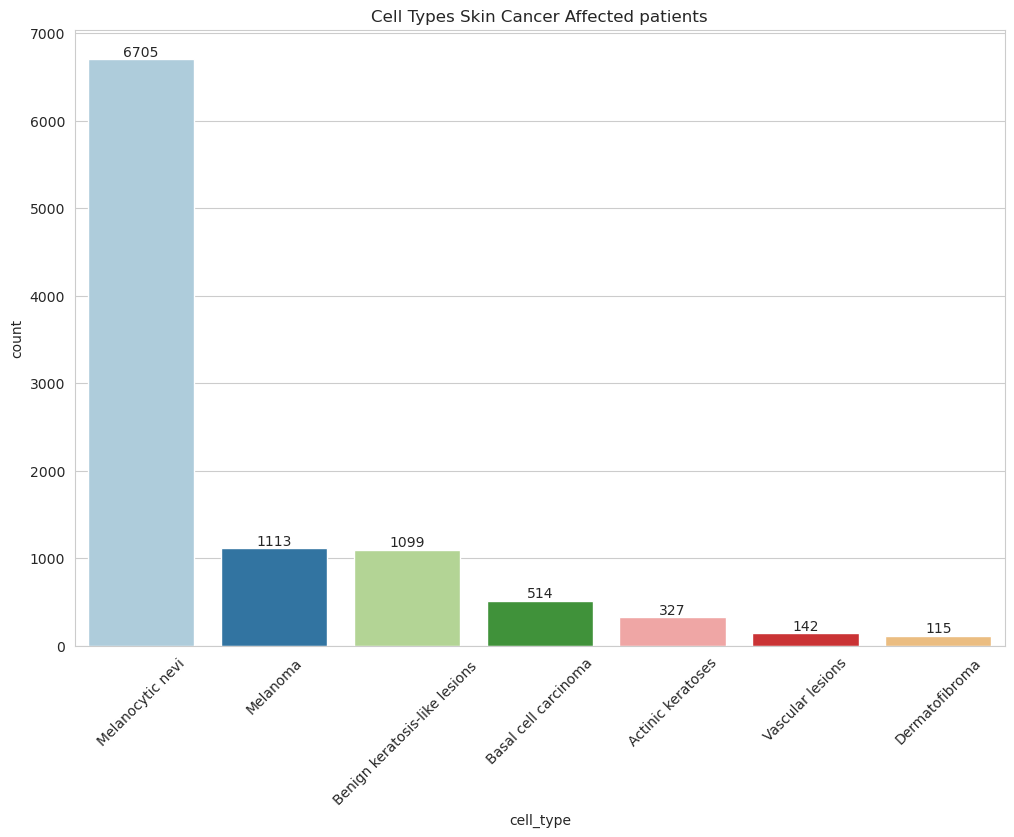

In [15]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='cell_type',data=df, order = df['cell_type'].value_counts().index, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Skin Cancer Affected patients')
plt.xticks(rotation=45)
plt.show()

## Note :

### There are vast number of cases of Melanocytic nevi as compared to others.
### Melanoma and Benign keratosis-like lesions are quite less wide spread as compared to Melanocytic nevi.
### Other cell type viruses subsequently affected less in numbers.

# Gender vs Cell type

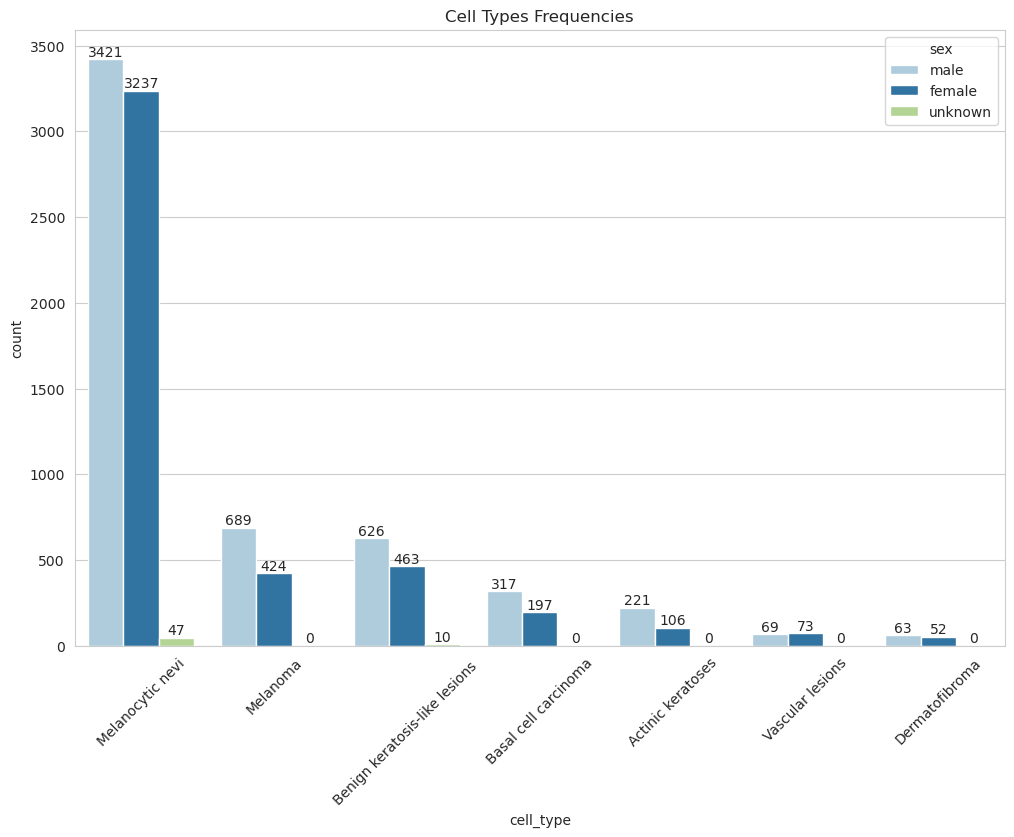

In [16]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='cell_type',hue='sex', data=df, order = df['cell_type'].value_counts().index, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Frequencies')
plt.xticks(rotation=45)
plt.show()

## Note :

### It seems for every skin type cancer, majority of males are victims.

## Cell Type

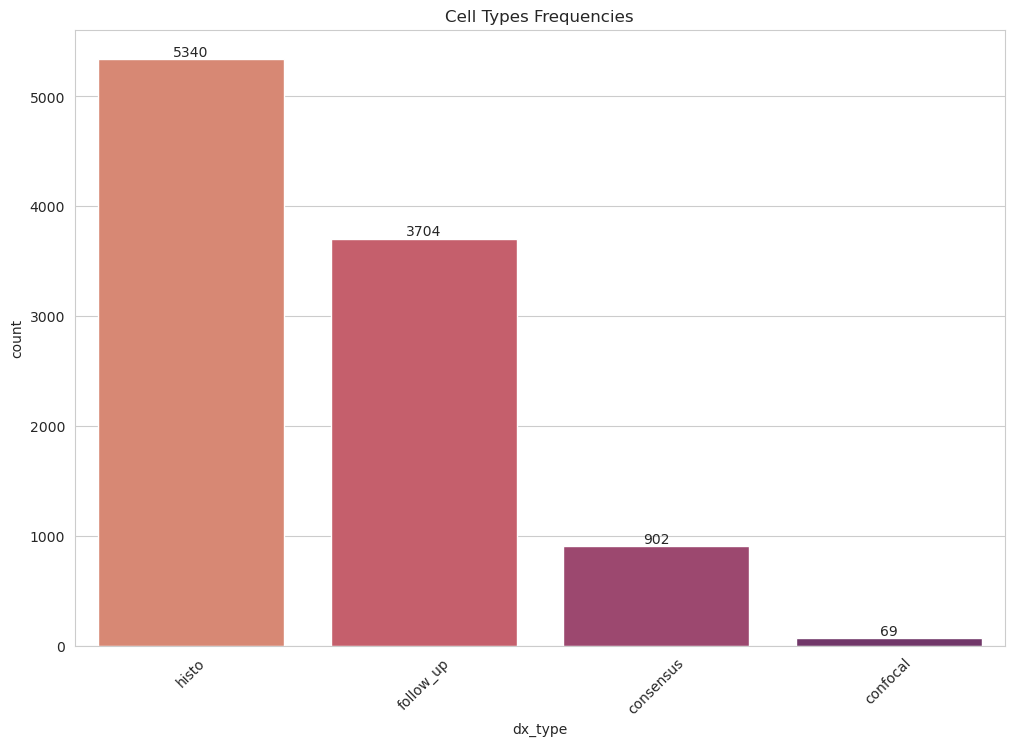

In [17]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx_type',data=df, order = df['dx_type'].value_counts().index, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Frequencies')
plt.xticks(rotation=45)
plt.show()

## Gender wise Cell Type Distribution

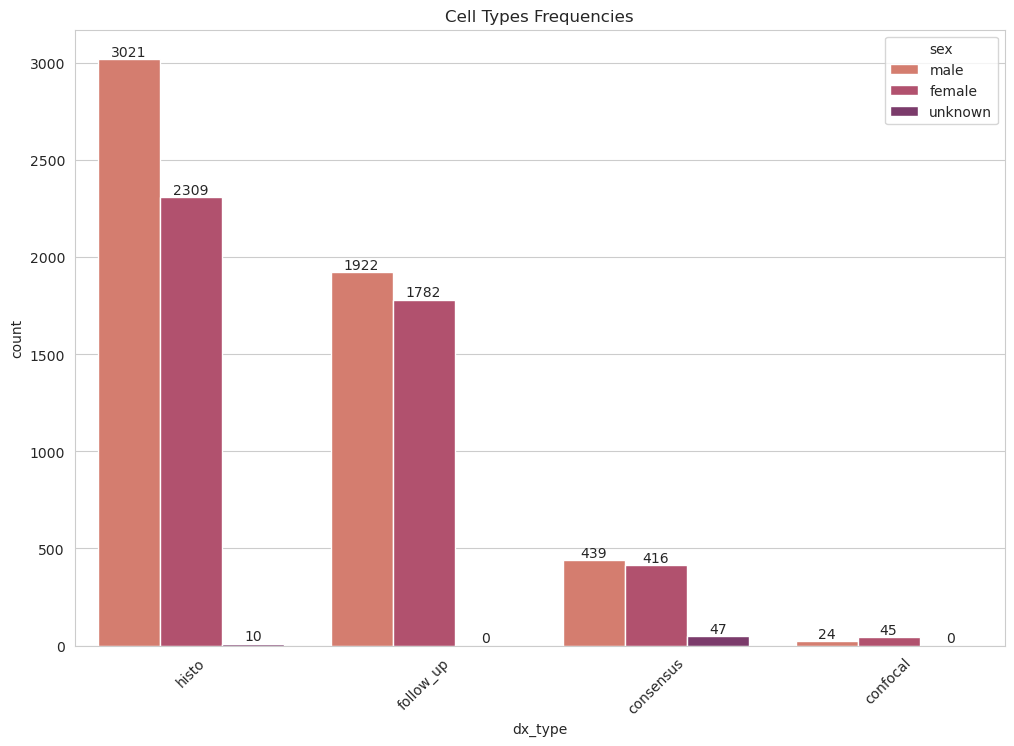

In [18]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx_type',hue='sex', data=df, order = df['dx_type'].value_counts().index, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Frequencies')
plt.xticks(rotation=45)
plt.show()

## Localization area

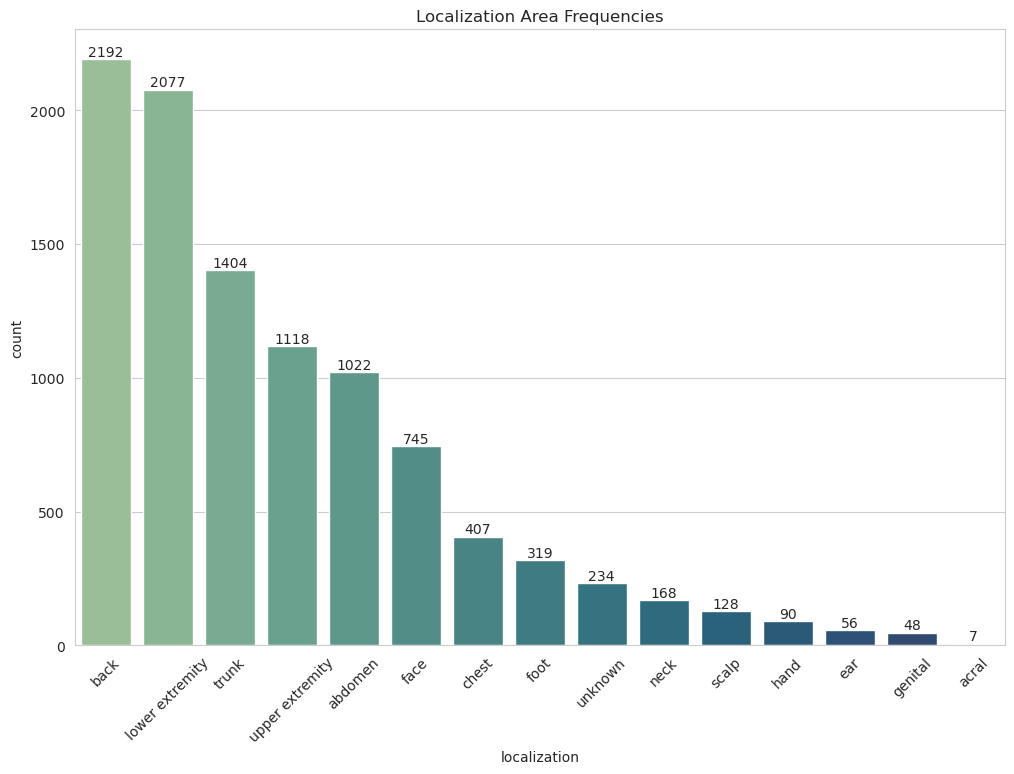

In [19]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='localization',data=df, order = df['localization'].value_counts().index, palette = 'crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Localization Area Frequencies')
plt.xticks(rotation=45)
plt.show()

## Note :

### It seems most of the area affected is related to particularly back, lower extremity or trunk etc.
### The significance we take out of it as the areas where the part gets sweaty easily

## Genderwise localization areas

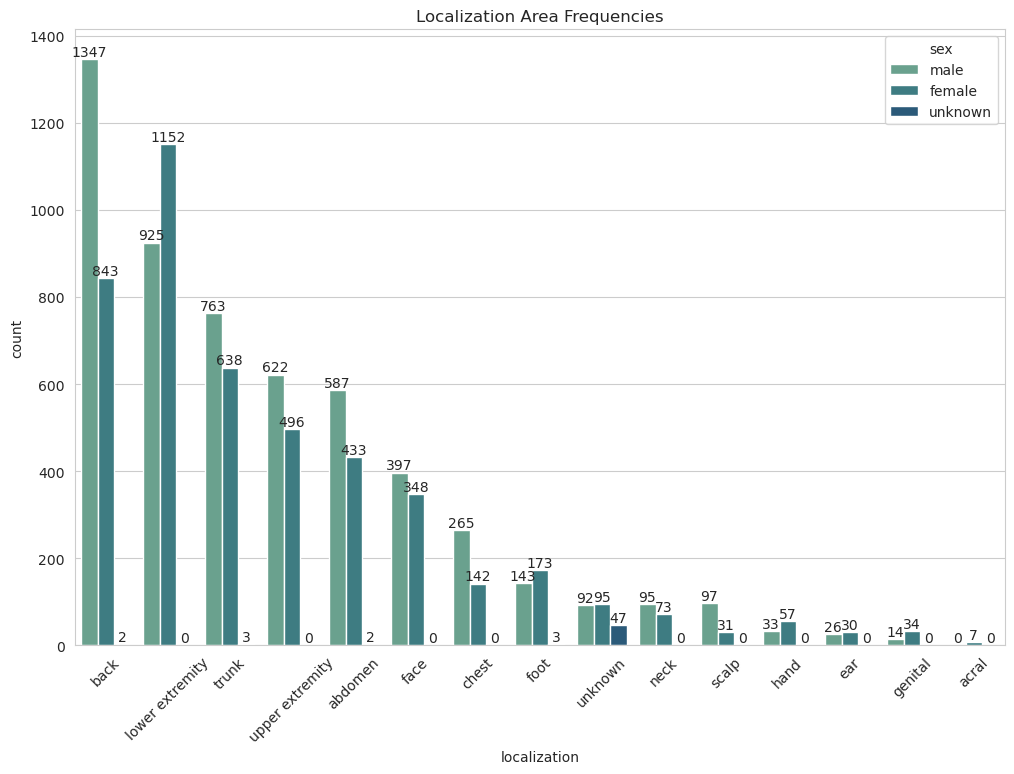

In [20]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='localization',hue='sex', data=df, order = df['localization'].value_counts().index, palette = 'crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Localization Area Frequencies')
plt.xticks(rotation=45)
plt.show()

# Age

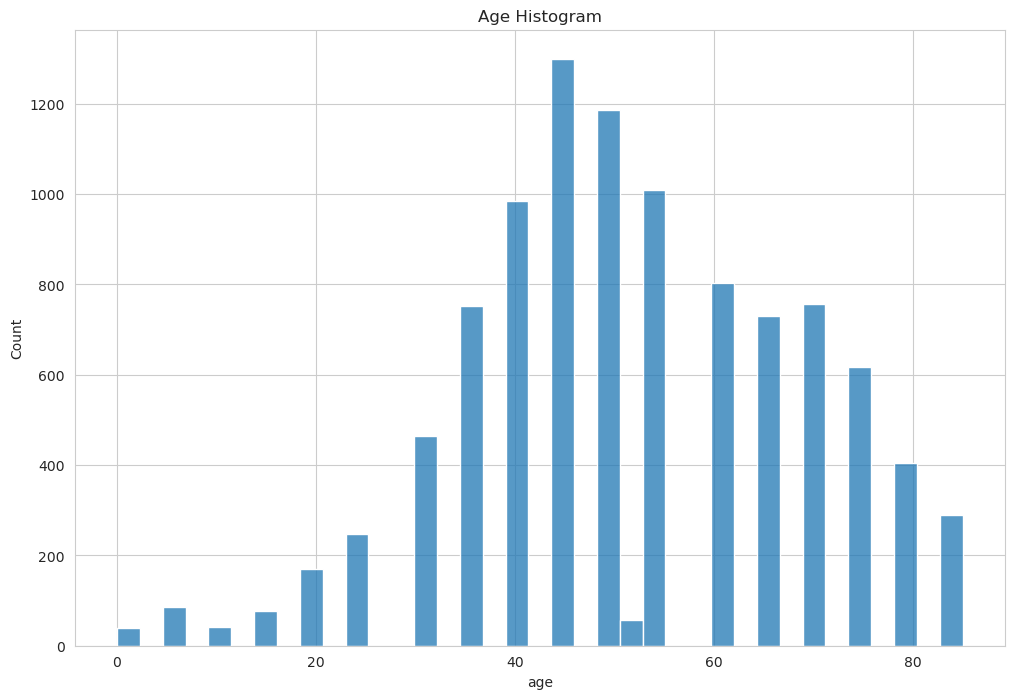

In [21]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x='age')
plt.title('Age Histogram')
plt.show()

## Note :

### It seems most of the affected people are around mid 40s.

## Gender wise Age distribution

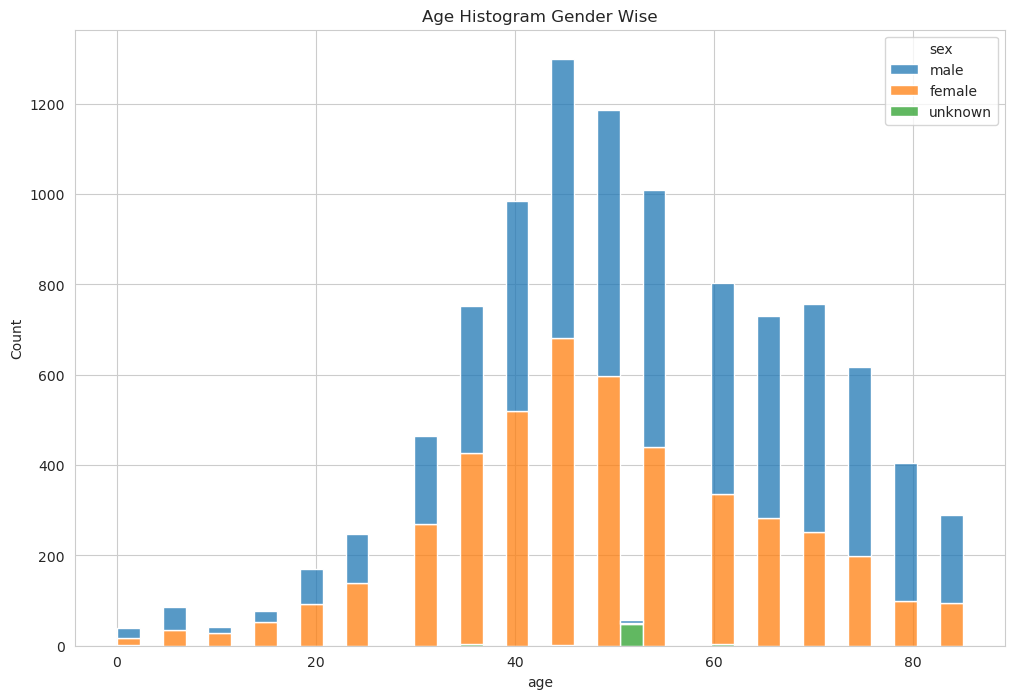

In [22]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x='age',hue='sex',multiple='stack')
plt.title('Age Histogram Gender Wise')
plt.show()

## Cell Type vs Age

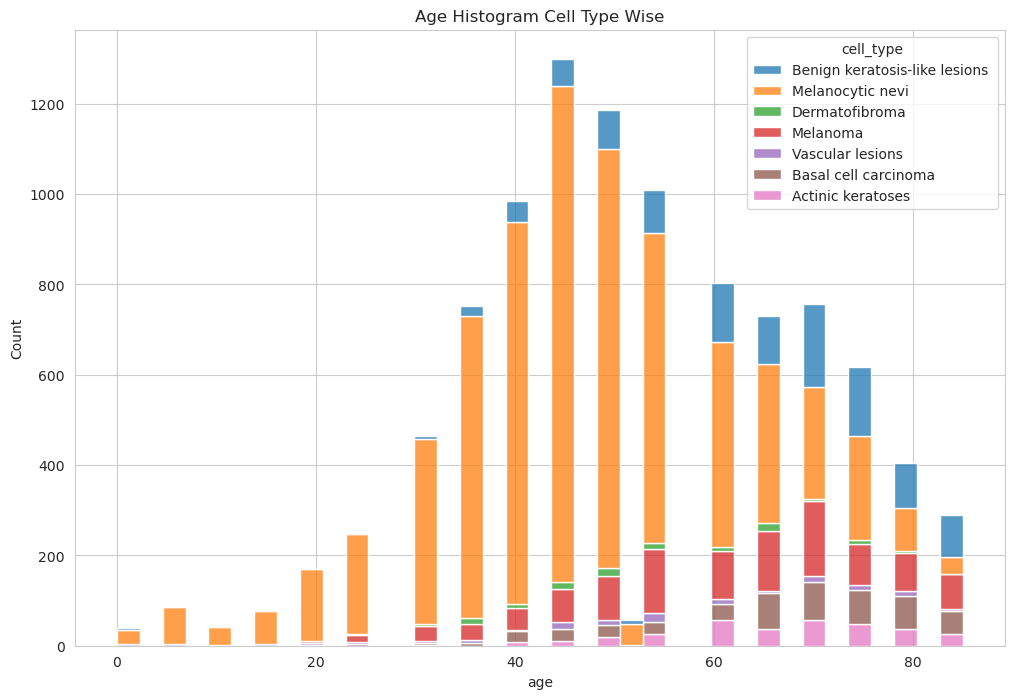

In [23]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x='age',hue='cell_type',multiple='stack')
plt.title('Age Histogram Cell Type Wise')
plt.show()

## Localization Area vs Age

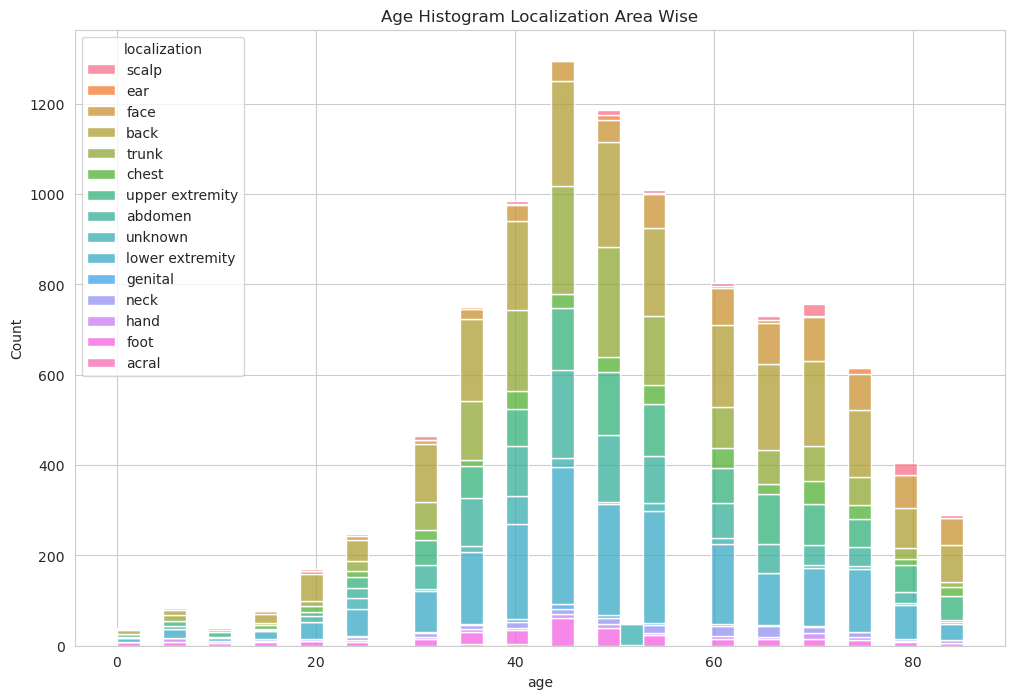

In [24]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x='age',hue='localization',multiple='stack')
plt.title('Age Histogram Localization Area Wise')
plt.show()

## Resizing the Image
### In order to allow the smooth and less processing time for the size of this much image data, it is better to resize the image.

In [25]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

## Pictorial representation of Images of dataset

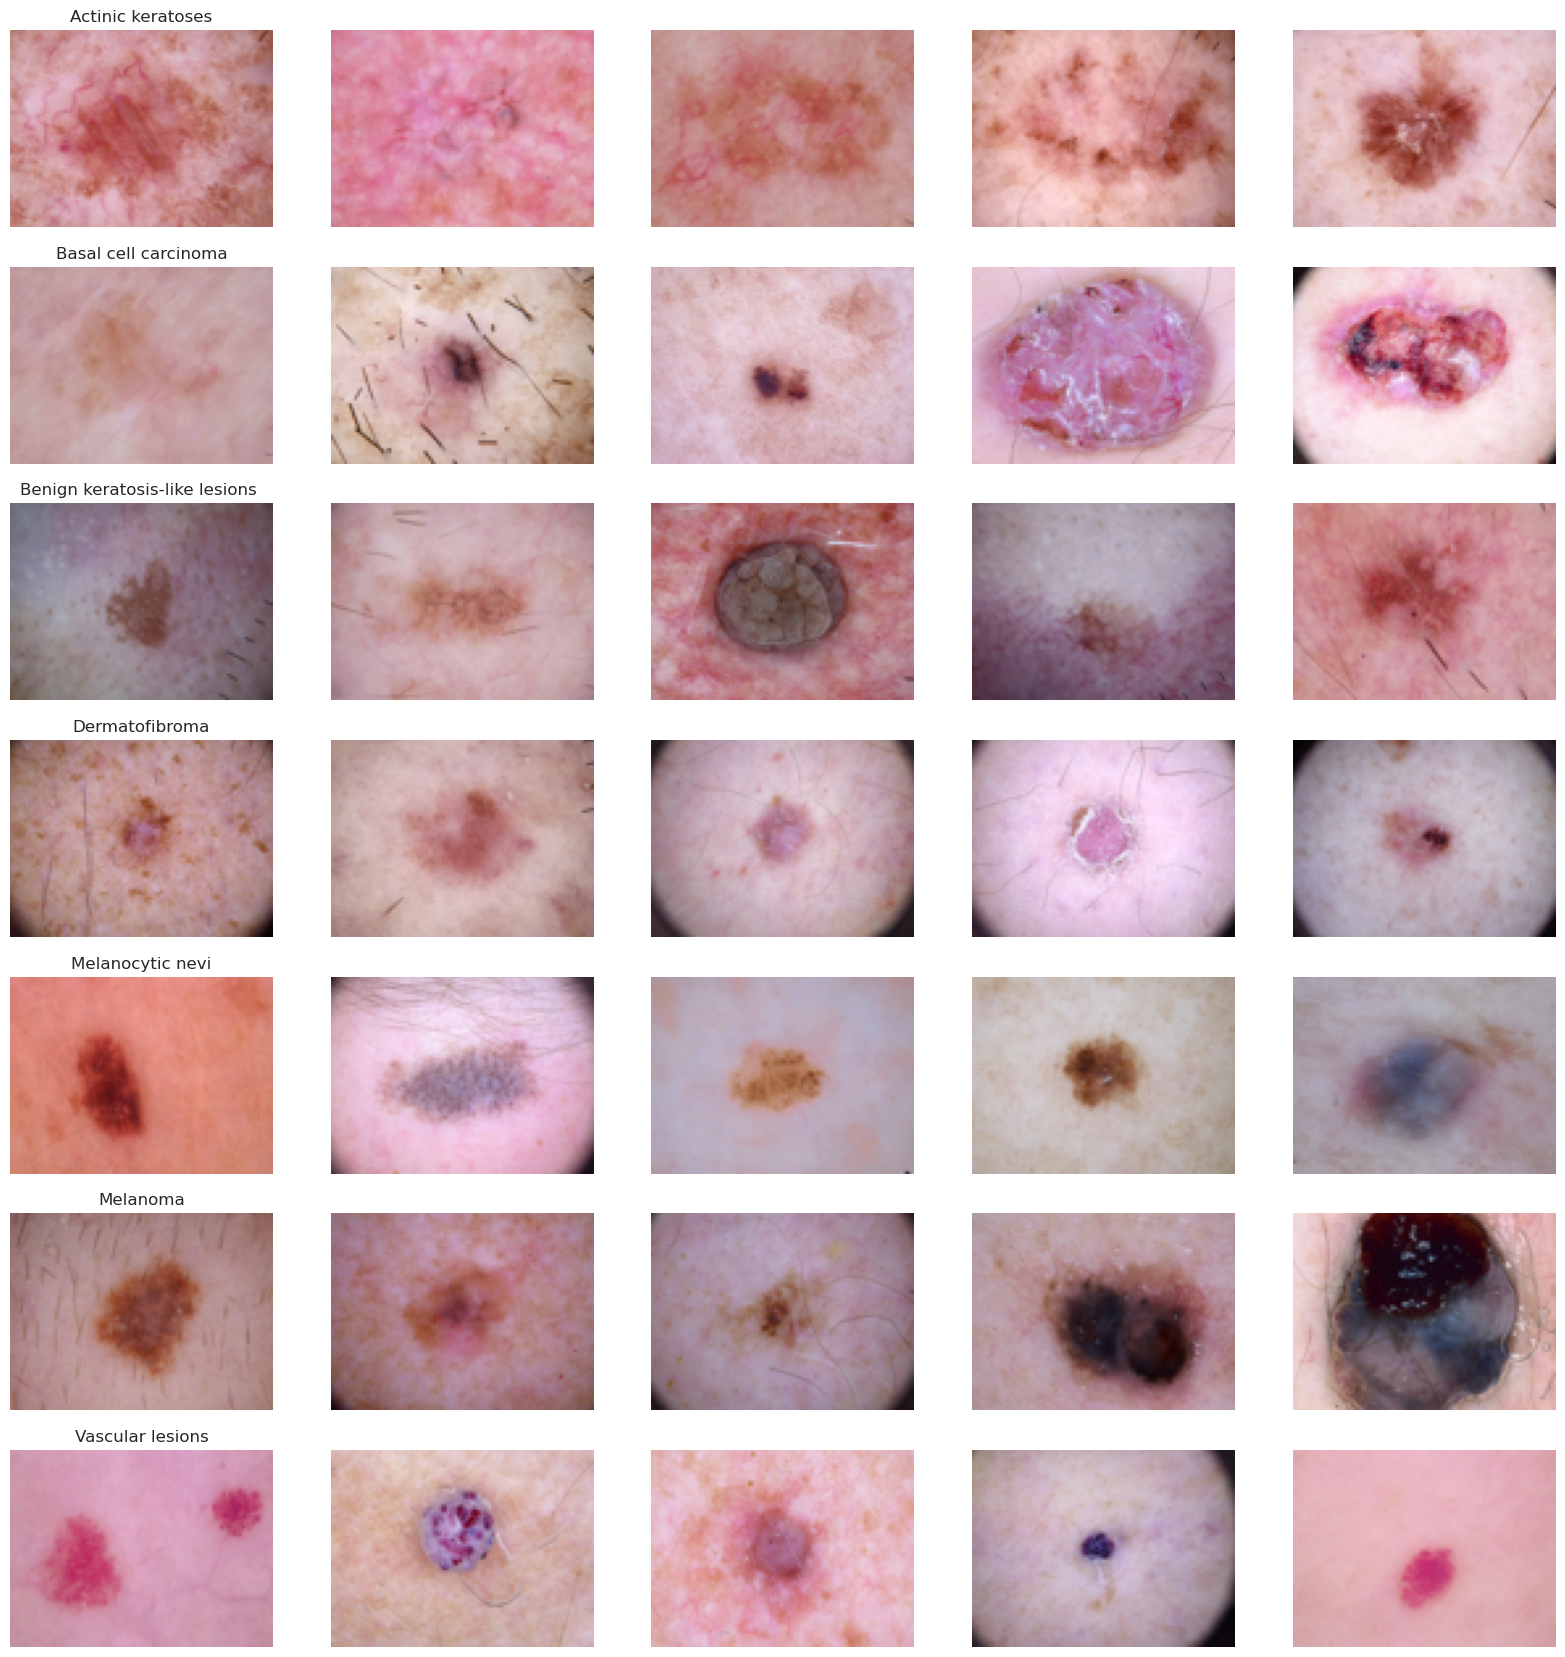

In [26]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

## Checking the image size distribution

In [27]:
df['image'].map(lambda x: x.shape).value_counts()

(75, 100, 3)    10015
Name: image, dtype: int64

## Setting target variable

In [28]:
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

## Splitting the Dataset

In [29]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=1234)

## Normalization of images

In [30]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

## One hot encoding on labels

In [31]:
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

## Splitting into training and validation set

In [32]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [33]:
# Reshape image in 3 dimensions (height = 75px, width = 100px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))

## Setting the CNN model

In [34]:
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
input_shape = (75, 100, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 100, 32)       896       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 100, 32)       9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 37, 50, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 50, 64)        36928     
                                                        

In [43]:
# # Define the optimizer
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)

# # Compile the model
# model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# # Set a learning rate annealer
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                             patience=3, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             learning_rate=0.00001)
model.compile(
    optimizer ='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

## Data augmentation to prevent overfitting

In [37]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

## Fitting the model

Epoch 1/5
8/8 [==============================] - 154s 19s/step - loss: 1.4212 - accuracy: 0.5760 - val_loss: 1.1513 - val_accuracy: 0.6808
Epoch 2/5
8/8 [==============================] - 153s 19s/step - loss: 1.2070 - accuracy: 0.6710 - val_loss: 1.1608 - val_accuracy: 0.6808
Epoch 3/5
8/8 [==============================] - 152s 19s/step - loss: 1.1307 - accuracy: 0.6696 - val_loss: 1.1278 - val_accuracy: 0.6808
Epoch 4/5
8/8 [==============================] - 152s 19s/step - loss: 1.1061 - accuracy: 0.6695 - val_loss: 1.0616 - val_accuracy: 0.6808
Epoch 5/5
8/8 [==============================] - 151s 19s/step - loss: 1.0784 - accuracy: 0.6713 - val_loss: 1.1013 - val_accuracy: 0.6808


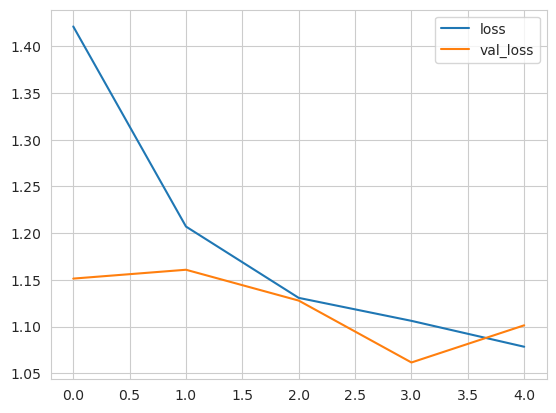

In [49]:
import keras
# epochs = 50
# batch_size = 10
# history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = (x_validate,y_validate),
#                               verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
#                               )

EarlyStop = keras.callbacks.EarlyStopping(
               min_delta = 0.001,
               patience = 10 ,
               verbose = 0
)
train = model.fit(x_train,
          y_train,
          batch_size = 1024,
          epochs= 5,
          callbacks=[EarlyStop],
          validation_data=(x_validate,y_validate) )
history_df = pd.DataFrame(train.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

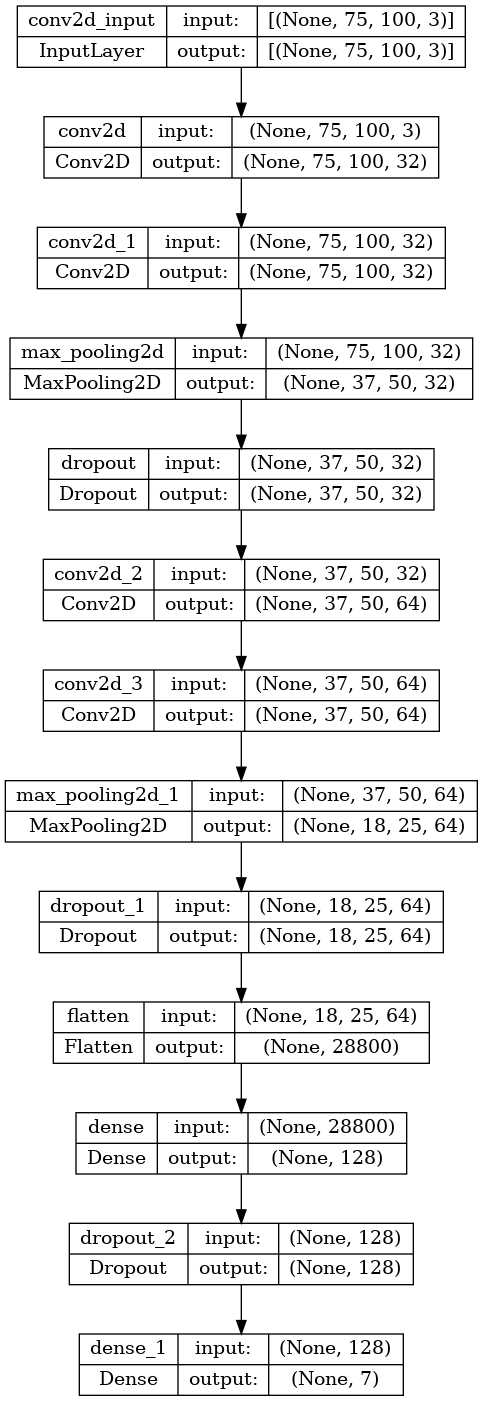

In [50]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)